In [1]:
import pandas as pd
import TECHNIC as QT
from TECHNIC import TSFM, MMGR, QQGR, QQ

## Internal Data Loader

In [2]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [3]:
ID_config = {
    'df': df_internal_raw,
    'start': '2018-01-15',
    'end': '2023-11-15',
    'freq': 'M'
}
IDLoader = QT.InternalDataLoader(**ID_config)
IDLoader.load()

In [4]:
IDLoader.internal_data.tail()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2023-07-31,2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2023-08-31,2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2023-09-30,2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2023-10-31,2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-11-30,2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Mev Loader

In [5]:
MEV_config = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
MEVLoader = QT.MEVLoader(**MEV_config)
MEVLoader.load()

In [6]:
MEVLoader.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.6,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.8,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440,8241.36,6.99,5.95
2030-03-31,104.82,10487.6,8309.24,3.75,8.16
2030-06-30,104.71,10610.6,8355.29,4.15,4.67
2030-09-30,104.76,10546.7,8319.09,6.61,3.77


In [7]:
MEVLoader.scen_mevs['fake_scens']['base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.6,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.8,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440,8241.36,6.99,5.95
2030-03-31,104.82,10487.6,8309.24,3.75,8.16
2030-06-30,104.71,10610.6,8355.29,4.15,4.67
2030-09-30,104.76,10546.7,8319.09,6.61,3.77


In [8]:
MEVLoader.model_map

{'PSR': 'Personal Savings Rate (%)',
 'PDI': 'Personal Disposable Income (Billions)',
 'UNRATE': 'Unemployment Rate (%)',
 'CPI': 'Consumer Price Index'}

## Data Manager

In [9]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': MEVLoader,
    'in_sample_end': '2023-06-01'
}
dm = QT.DataManager(**dm_config)

In [10]:
dm.internal_in

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2018-01-31,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-02-28,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-03-31,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2018-04-30,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2018-05-31,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,2023-01-31,2406.497172,0.058002,2365.768354,0.033182,2171.207724,0.029665,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-28,2023-02-28,2414.061046,0.058024,2401.306374,0.040102,2190.279429,0.028939,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-31,2023-03-31,2432.376193,0.042938,2412.529681,0.038373,2204.747754,0.016928,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2023-04-30,2023-04-30,2440.940224,0.045273,2428.151430,0.051046,2218.766721,0.027354,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
dm.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583
...,...,...,...,...,...
2030-08-31,104.723199,10583.356792,8335.923233,5.871737,3.600410
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000
2030-10-31,104.821508,10508.335975,8302.079944,7.095223,4.235333
2030-11-30,104.905647,10482.105303,8289.926172,7.143834,4.837014


## Model Building

### CM

In [12]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': QT.OLS
}
cm1 = QT.CM(**cm_config)

In [13]:
mth_var = [f'M{i}' for i in range(2,5)]
indep_vars = [mth_var, 'NGDP']
cm1.build(indep_vars)

=== In-Sample Performance ===
       r2    adj_r2          me         mae        rmse
 0.705074  0.685413  515.865766  143.701378  190.572818

=== Out-of-Sample Performance ===
         me         mae        rmse
 762.857989  383.648044  430.941118

=== Model Parameters ===
Variable        Coef Pvalue       VIF       Std
   const -1.0538e+05  0.000 131997.74 8938.5811
      M2    222.5467  0.014      1.08   88.3770
      M3    328.1969  0.001      1.13   90.3893
      M4    278.6532  0.003      1.09   88.7724
    NGDP   1034.7491  0.000      1.19   86.4290


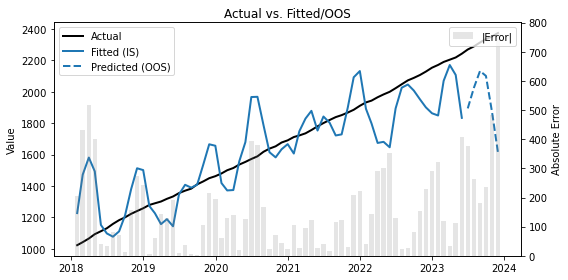


=== Model Testing ===
                              statistic    pvalue  passed
Category         Test                                    
NormalityTest    Jarque_Bera   2.841708  0.241508    True
                 Shapiro       0.964978  0.062586    True
StationarityTest ADF           0.120809  0.967453   False


In [14]:
cm1.show_report(show_tests=True)

In [15]:
print(cm1)

VR_balance~C+M2+M3+M4+NGDP


### Segment

In [16]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': QT.OLS,
    'export_template_cls': QT.PPNR_OLS_ExportTemplate
}

seg1 = QT.Segment(**seg_config)

In [17]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

VR_balance~C+NGDP

In [18]:
# CM2
mth_var = [f'M{i}' for i in range(2,5)]
indep_vars = [mth_var, 'NGDP']
seg1.build_cm('cm2', indep_vars)

VR_balance~C+M2+M3+M4+NGDP

In [19]:
# CM3
mth_var = [f'M{i}' for i in range(2,5)]
tsfm_var = [TSFM('PSR', QQGR)]

indep_vars = [mth_var, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

VR_balance~C+M2+M3+M4+NGDP+PSR_QQGR

=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.596697  0.590295  509.892567  183.046368  222.854010
cm2    0.705074  0.685413  515.865766  143.701378  190.572818
cm3    0.736057  0.713689  437.255673  138.706508  180.285101

=== Out-of-Sample Performance ===
               me         mae        rmse
Model                                    
cm1    694.567432  366.114671  403.420456
cm2    762.857989  383.648044  430.941118
cm3    963.332163  402.786230  505.705045

=== Performance Plot ===


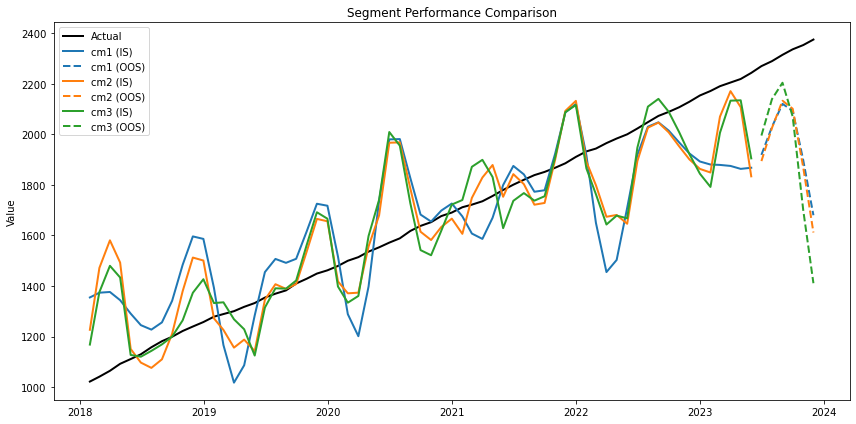


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue            VIF          Std
0    const -88719.982410  9.654477e-14  111107.892197  9358.853151
1     NGDP    874.300386  4.848960e-14       1.000000    90.558474

=== Model: cm2 — Parameters ===
  Variable           Coef        Pvalue            VIF          Std
0    const -105378.197744  2.924213e-17  131997.744181  8938.581111
1       M2     222.546657  1.448303e-02       1.081146    88.376988
2       M3     328.196940  5.858566e-04       1.130940    90.389262
3       M4     278.653181  2.629497e-03       1.090843    88.772446
4     NGDP    1034.749124  1.521563e-17       1.186288    86.428974

=== Model: cm3 — Parameters ===
   Variable           Coef        Pvalue            VIF           Std
0     const -108692.843866  2.169278e-18  134877.447752   8619.925298
1        M2     214.925987  1.346971e-02       1.082421     84.361386
2        M3     325.358242  3.764683e-04       1.131117     86.238127
3        M4 

In [22]:
seg1.show_report(show_params=True, show_tests=True)